In [1]:
import tensorflow as tf

/Users/lavanyamanohar/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
print(tf.__version__)

1.10.0


In [3]:
"""
we import the save_bottlenec_features script that generates our training data, and runs them on a VGG network once
to learn the training and the validation features of the convolutional network (i.e. before the fully connected layers)

"""



import save_bottleneck_features

Using TensorFlow backend.


Found 1200 images belonging to 6 classes.
10/10 [==============================] - 2s 180ms/step
0
10/10 [==============================] - 2s 175ms/step
1
10/10 [==============================] - 2s 183ms/step
2
10/10 [==============================] - 2s 177ms/step
3
10/10 [==============================] - 2s 188ms/step
4
10/10 [==============================] - 2s 172ms/step
5
10/10 [==============================] - 2s 170ms/step
6
10/10 [==============================] - 2s 170ms/step
7
10/10 [==============================] - 2s 171ms/step
8
10/10 [==============================] - 2s 171ms/step
9
10/10 [==============================] - 2s 173ms/step
10
10/10 [==============================] - 2s 184ms/step
11
10/10 [==============================] - 2s 177ms/step
12
10/10 [==============================] - 2s 186ms/step
13
10/10 [==============================] - 2s 198ms/step
14
10/10 [==============================] - 2s 185ms/step
15
10/10 [==============================] -

19
10/10 [==============================] - 2s 177ms/step
20
10/10 [==============================] - 2s 168ms/step
21
10/10 [==============================] - 2s 165ms/step
22
10/10 [==============================] - 2s 167ms/step
23
10/10 [==============================] - 2s 166ms/step
24
10/10 [==============================] - 2s 165ms/step
25
10/10 [==============================] - 2s 167ms/step
26
10/10 [==============================] - 2s 167ms/step
27
10/10 [==============================] - 2s 166ms/step
28
10/10 [==============================] - 2s 166ms/step
29


In [4]:
"""
running the top_model script which loads the previously saved features and trains a fully connected 
model on top of it. Since its a fairly small model , run over 10 epochs, the whole thing runs on a CPU within 
5 minutes for a 92% validation accuracy...not too shabby!

"""

import top_model

Train on 1200 samples, validate on 300 samples
Epoch 1/10
1200/1200 [==============================] - 6s 5ms/step - loss: 0.4763 - acc: 0.8292 - val_loss: 0.2093 - val_acc: 0.9300
Epoch 2/10
1200/1200 [==============================] - 4s 4ms/step - loss: 0.1269 - acc: 0.9617 - val_loss: 0.1658 - val_acc: 0.9533ss:
Epoch 3/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0880 - acc: 0.9742 - val_loss: 0.1970 - val_acc: 0.9267
Epoch 4/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0949 - acc: 0.9658 - val_loss: 0.1201 - val_acc: 0.9600
Epoch 5/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0893 - acc: 0.9675 - val_loss: 0.1101 - val_acc: 0.9567
Epoch 6/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0521 - acc: 0.9833 - val_loss: 0.1431 - val_acc: 0.9433
Epoch 7/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0860 - acc: 0.9675 - val_loss: 0.2608 - val_acc: 0.9133
Epoch 8/10
1

In [112]:

"""
Lets check out our model's predictions for some images in the test directory. To simplify this, lets define some helper
functions like read_image which allows us to visualize and feed the right dimensions into our model. 
We also need to do a few imports that were not defined outside for visualization and manipulations in Keras 

"""


import numpy as np 

import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras.preprocessing import image
import matplotlib.pyplot as plt 
from scipy import misc
%matplotlib inline


def read_image(file_path):
   image = load_img(file_path, target_size=(128, 128)) 
   image = img_to_array(image) 
   image = np.expand_dims(image, axis=0)
   image /= 255. 
   return image

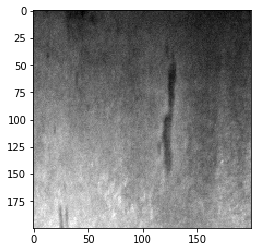

In [114]:
## lets pull a random image from our test set...feel free to modify this to other image paths to see more results
test_img_path = './data/test/In/In_204.bmp'
test_img = misc.imread(test_img_path)
plt.imshow(test_img)


In [115]:
"""
lets now transform this image in order to be able to feed it to our defined network. Remeber that we have 2 networks. 
The first is VGG16 which we used for transfer learning. this network defined for us within keras expects input image of size (128,128)
our read_image function does this for us along with normalizing the scale etc. 

the second network which is our own defined CNN expects an input size that is the output of VGG16 without the top layer which is 4*4*512 = 8192
and outputs class predictions across the 6 classes of steel surface 
"""

image = read_image(test_img_path)
##lets check the shape and make sure its (128, 128) 
image.shape


(1, 128, 128, 3)

In [116]:
from keras.applications import VGG16

In [117]:
input_shape = (128, 128,3) 
vgg_conv = VGG16(weights = 'imagenet', include_top = False, input_shape = input_shape)
preds = vgg_conv.predict(image) 


In [118]:
## check that the output shape for single image is (4,4,512) 
preds.shape

(1, 4, 4, 512)

In [119]:
##reshape to 8192 to enable prediction through our custom defined model 

model_input = np.reshape(preds, (1, 8192))

In [120]:
##check that the shape is indeep (1,8192)
model_input.shape

(1, 8192)

In [121]:
##lets do a simple model.predict to see how the numeric values of the probabilities line up 
model.predict(model_input)

array([[1.6405628e-06, 9.6050876e-01, 3.4300385e-05, 1.9208567e-02,
        4.4039962e-07, 2.0246329e-02]], dtype=float32)

In [122]:
##define our classes as an array and output the model class to get away from the probababilities to just the answer 
classes = ['Cr', 'In', 'Pa', 'PS', 'RS', 'Sc']
class_prediction = model.predict_classes(model_input)
classes[int(class_prediction)]


'In'

In [123]:
"""
thats it! 

"""

'\nthats it! \n\n'